In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox

In [2]:
G = ox.load_graphml("data/osmnx/graph.graphml")

In [3]:
public_gps_df = pd.read_csv("data/public/public_gps_traces_bbox.csv")

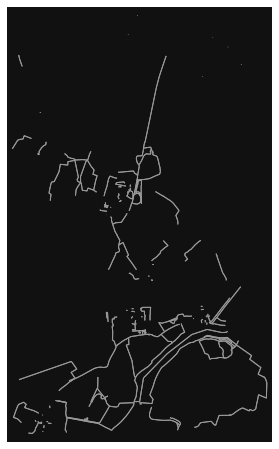

In [30]:
fig, ax = ox.plot_graph(G, node_size=0)

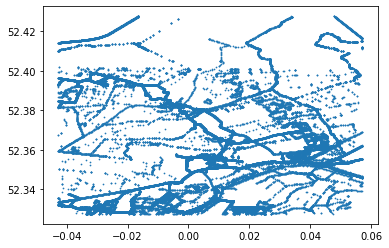

In [19]:
plt.scatter(public_gps_df["longitude"], public_gps_df["latitude"], s=2, marker='.')

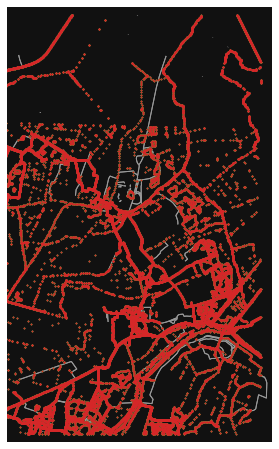

In [18]:
fig

In [38]:
d = 10

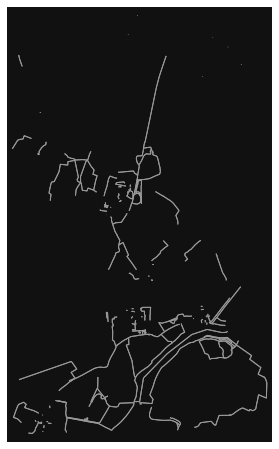

In [44]:
fig, ax = ox.plot_graph(G, node_size=0)
ax.scatter(public_gps_df["longitude"].loc[public_gps_df["dist"] < d], public_gps_df["latitude"].loc[public_gps_df["dist"] < d], s=2, marker='.')

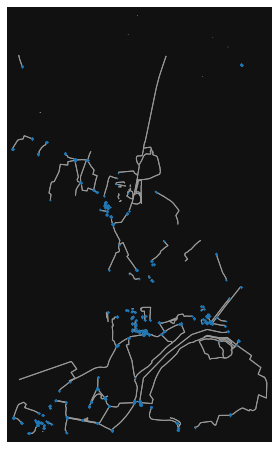

In [46]:
fig

<AxesSubplot:>

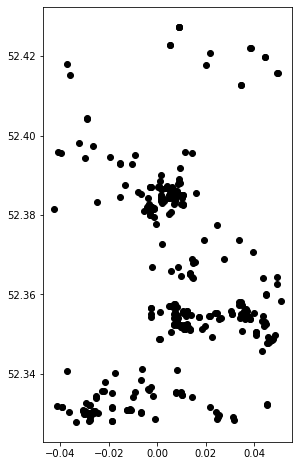

In [50]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(G)
nodes.head()

# Plot the nodes
fig, ax = plt.subplots(figsize=(12,8))
nodes.plot(ax=ax, facecolor='black')

In [51]:
edges.plot(ax=ax, facecolor='black')

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

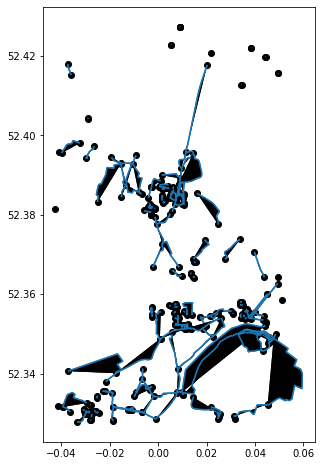

In [52]:
fig

In [22]:
X = public_gps_df["longitude"]
Y = public_gps_df["latitude"]

In [41]:
nearest_edges, dists = ox.nearest_edges(G, X, Y, return_dist=True, interpolate=10)

In [31]:
public_gps_df["nn"] = nearest_nodes

In [42]:
public_gps_df["dist"] = dists

In [43]:
public_gps_df

,latitude,longitude,nn,dist
0,52.345884,0.057120,8857288591,721.235205
1,52.345927,0.057077,8857288591,716.448261
2,52.345970,0.057013,8857288591,710.373691
3,52.346013,0.056970,8857288591,705.607671
4,52.346055,0.056906,8857288591,699.544605
...,...,...,...,...
76560,52.361168,0.055858,3393580282,467.008403
76561,52.361378,0.056128,3393580282,476.591386
76562,52.361587,0.056398,1991106287,487.839643
76563,52.361798,0.056670,1991106287,500.625238


In [48]:
dists = np.array(dists)

(array([ 78., 184., 653., 949., 402., 615., 498., 486., 578., 333.]),
 array([0.07149703, 1.06407261, 2.05664819, 3.04922377, 4.04179936,
        5.03437494, 6.02695052, 7.0195261 , 8.01210169, 9.00467727,
        9.99725285]),
 <BarContainer object of 10 artists>)

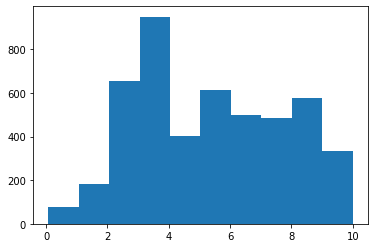

In [49]:
plt.hist(dists[dists<10])